<a href="https://colab.research.google.com/github/siggu/Python/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%84%98%ED%8C%8C%EC%9D%B4_%EC%96%B4%EB%A0%88%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 넘파이 어레이
기본 설정  
`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [ ]:
# 넘파이
import numpy as np

# 랜덤 시드
np.random.seed(12345)

# 어레이에 사용되는 부동소수점들의 정확도 지점
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt

# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 4.1 넘파이란?  
**넘파이**는 numerical python의 줄임말이며, 파이선 데이터 과학에서 가장 중요한 도구를 제공하는 패키지이다. 넘파이가 제공하는 가장 중요한 요소는 아래 두 가지이다.  
- 다차원 어레이(배열)
- 메모리 효율적인 빠른 어레이 연산  

넘파이의 기능을 잘 이해한다면 이어서 다룰 **판다스pandas** 패키지가 지원하는 모델링이나 통계 등 데이터 과학에 필요한 도구를 매우 쉽게 활용할 수 있다.

리스트 연산과 넘파이 어레이 연산의 속도 차이를 아래 코드가 보여준다. 아래 코드는 0부터 999,999까지의 숫자를 각각 두 배하는 연산에 필요한 시간을 측정한다. 결과적으로 넘파이 어레이를 이용한 연산이 50배 정도 빠르다

In [ ]:
my_array = np.arange(100000)
my_list = list(range(100000))

아래 코드에서 my_array * 2는 my_array 어레이의 항목 각각을 두 배한 값을 항목으로 갖는다.

In [ ]:
%time for _ in range(10): my_array2 = my_array * 2

CPU times: user 4.28 ms, sys: 25 µs, total: 4.3 ms
Wall time: 8.27 ms


In [ ]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 75 ms, sys: 24.3 ms, total: 99.3 ms
Wall time: 104 ms


이제부터 넘파이에 대해 필수적으로 알아 두어야만 하는 내용들을 정리하며 살펴본다.

## 4.2 다차원 어레이  
리스트, 튜플 등을 `np.array()` 함수를 이용하여 어레이러 변환시킬 수 있다.

### 4.2.1 1차원 어레이
- 리스트 활용


In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

- 튜플 활용

In [ ]:
data1 = (6, 7.5, 8, 0 ,1)
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

`ndarray` 자료형  
넘파이 어레이의 자료형은 `ndarray`이다.

In [ ]:
type(arr1)

numpy.ndarray

### 4.2.2 2차원 어레이  
중첩된 리스트나 어레이는 2차원 어레이로 변환된다. 단, 항목으로 사용된 리스트의 길이가 모두 동일해야 한다. 즉, 2차원 어레이는 어레이의 모든 항목이 동일한 크기의 1차원 어레이다.

In [ ]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

`shape` 속성  
어레이 객체의 `shape` 속성은 생성된 어레이의 모양을 저장한다. 행렬 모양의 어레이는 행과 열의 크기를 이용한 튜플로 보여준다. 위 어레이의 모양(shape)은 (2, 4)이다. 

- 2 : 항목이 두 개
- 4 : 각각의 항목은 길이가 5인 어레이

In [ ]:
arr2.shape

(2, 4)

`dtype` 속성  
어레이 객체의 `dytpe` 속성은 어레이에 사용된 항목들의 자료형을 저장한다. 어레이의 모든 항목은 **동일한 자료형**을 가져야 한다. 넘파이는 파이썬 표준에서 제공하는 자료형보다 세분화된 자료형을 지원한다. 예를 들어, `float64`는 64비트로 구현된 부동소수점 자료형을 가리킨다.

arr2 항목의 자료형은 `int64` 즉, 64비트로 구현된 정수 자료형이다.

In [ ]:
arr2.dtype

dtype('int64')

`ndim` 속성  
차원은 `ndim` 속성에 저장되며, `shape`에 지정된 튜플의 길이와 동일하다.

In [ ]:
arr2.ndim

2

1차원 어레이의 차원은 1이다.

In [ ]:
arr1.ndim

1

1차원 어레이의 모양은 어레이의 길이 정보를 길이가 1인 튜플로 저장한다.

In [ ]:
arr1.shape

(5,)

### 4.2.3. 3차원 어레이  
(n, m, p) 모양의 3차원 어레이를 이해하는 두 가지 방법은 다음과 같다.  
- 방법 1: 바둑판을 (n, m) 크기의 격자로 나누고 각각의 칸에 길이가 p인 1차원 어레이가 위차하는 것으로 이해하기. 이미지 데이터로 이해하는 최선의 방법이다.

- 방법 2: (m, p) 모양의 2차원 어레이 n 개를 항목으로 갖는 1차원 어레이로 이해하기.
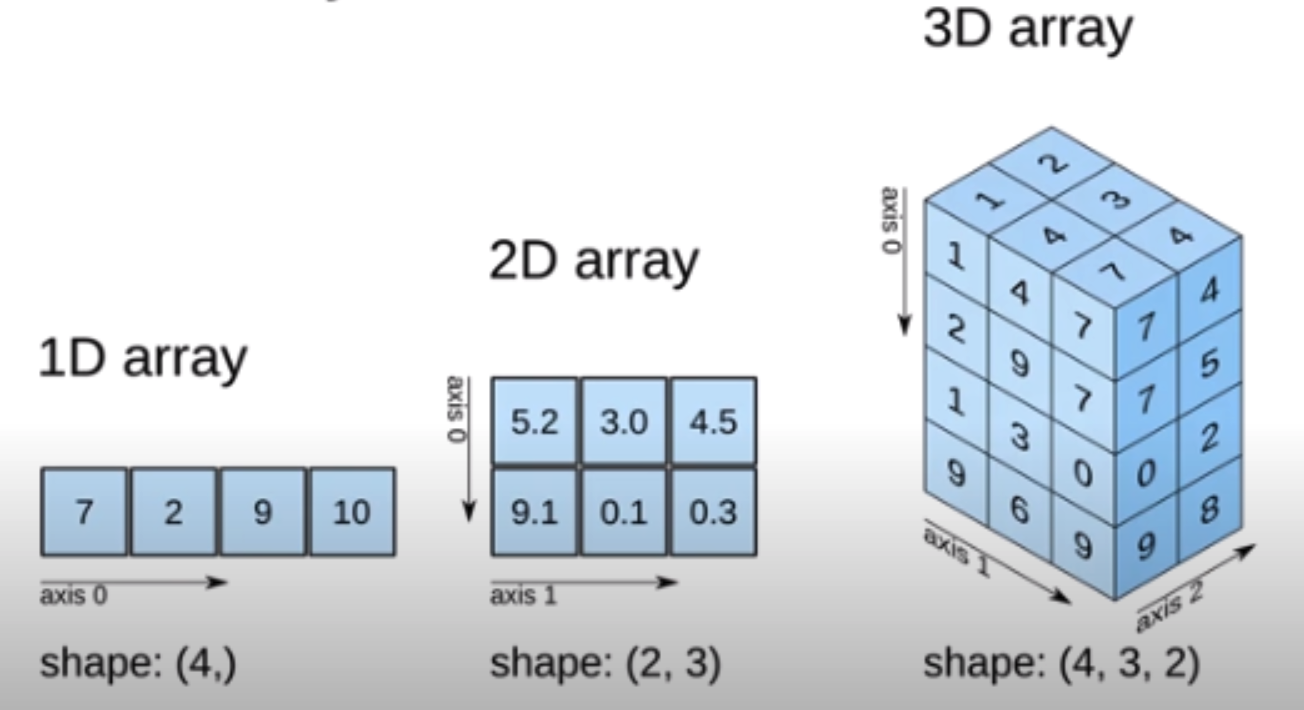

위 이미지를 직접 구현하면 다음과 같다.

- 1D 어레이

In [ ]:
np.array([7,2,9,10])

array([ 7,  2,  9, 10])

- 2D 어레이

In [ ]:
np.array([[5.2, 3.0, 4.5], 
          [9.1, 0.1, 0.3]])

array([[5.2, 3. , 4.5],
       [9.1, 0.1, 0.3]])

- 3D 어레이

In [ ]:
np.array([[[1,2],
           [4,3],
           [7,4]],
          [[2,3],
           [9,10],
           [7,5]],
          [[1,2],
           [3,4],
           [0,2]],
          [[9,11],
           [6,5],
           [9,8]]])

array([[[ 1,  2],
        [ 4,  3],
        [ 7,  4]],

       [[ 2,  3],
        [ 9, 10],
        [ 7,  5]],

       [[ 1,  2],
        [ 3,  4],
        [ 0,  2]],

       [[ 9, 11],
        [ 6,  5],
        [ 9,  8]]])

**어레이 객체 생성 함수**  
`zeros()` 함수  
0으로 이루어진 어레이를 생성한다. 1차원인 경우 정수를 인자로 사용한다.

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

2차원부터는 정수들의 튜플로 모양을 지정한다.

In [ ]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
np.zeros((4,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

`empty()` 함수  
지정된 모양의 어레이를 생성한다. 항목은 초기화하지 않는다. 임의의 값이 보일 수 있지만 실제로는 어떤 항목도 임의로 지정된 것이 아니다.

In [ ]:
np.empty((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [ ]:
np.empty((2,3,2)).dtype

dtype('float64')

`arange()`함수  
`range()` 함수와 유사하게 작동되며 부동소수점 스텝도 지원한다.

In [ ]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

## 4.3. dtype : 어레이 항목의 자료형
`dtype` 속성은 어레이 항목의 자료형을 담고 있으며, 파이썬 표준 라이브러리에서 제공하는 `int`, `float`, `str`, `bool` 등을 보다 세분화시킨 자료형을 제공한다.

### 4.3.1. 기본 `dtype`
여기서는 세분화된 자료형을 일일이 설명하기 보다는 예제를 이용하여 세분화된 자료형의 형식을 살펴본다. 자료형 세분화는 주로 자료형의 객체가 사용하는 메모리 용량을 제한하는 형식으로 이루어진다. 이를 통해 보다 효율적이고 빠른 메모리 계산이 가능해졌다.

`float64` 자료형

In [ ]:
arr1 = np.array([1,2,3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [ ]:
arr1 = np.array([1,2,3], dtype='f8')
arr1.dtype

dtype('float64')

`int32` 자료형

In [ ]:
arr2 = np.array([1,2,3], dtype=np.int32)
arr2

array([1, 2, 3], dtype=int32)

In [ ]:
arr2 = np.array([1,2,3], dtype='i4')
arr2

array([1, 2, 3], dtype=int32)

`astype()` 메서드  
`astype()` 메서드를 이용해 dtype을 변경할 수 있다. 즉, 항목의 자료형을 강제로 변환시킨다.

- `int` 자료형을 `float` 자료형으로 형변환하기

In [ ]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int64')

In [ ]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

`float` 자료형을 `int` 자료형으로 형변환하기

- 소수점 이하는 버림

In [ ]:
arr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
arr.dtype

dtype('float64')

In [ ]:
int_arr = arr.astype(np.int64)
int_arr.dtype

dtype('int64')

- 숫자 형식의 문자열을 숫자로 형변환하기

In [ ]:
numeric_strings = np.array(['1.23', '-9.3', '42'], dtype=np.string_)
numeric_strings.dtype

dtype('S4')

In [ ]:
numeric_strings.astype(float)

array([ 1.23, -9.3 , 42.  ])

**주의사항** 문자열 자료형의 크기는 넘파이가 알아서 임의로 정하며, 부동소수점으로 형변환하면 지정된 정밀도에 따라 소수점 이하를 자른다.

In [ ]:
numeric_string2 = np.array(['1.234567', '-9.14234523', '42'], dtype=np.string_)
numeric_string2.dtype

dtype('S11')

앞서 부동소수점 정밀도를 4로 지정했기 때문에 어레이 항목은 모두 소수점 이하 네 자리까지만 보여준다.

In [ ]:
np.set_printoptions(precision=4, suppress=True)
numeric_string2.astype(float)

array([ 1.2346, -9.1423, 42.    ])

부동소수점 정밀도를 변경하면 그에 따라 다르게 결정된다.

In [ ]:
np.set_printoptions(precision=6, suppress=True)
numeric_string2.astype(float)

array([ 1.234567, -9.142345, 42.      ])

`astype()` 메서드의 인자로 다른 배열의 `dtype` 정보를 이용할 수도 있다.

In [65]:
int_array = np.arange(10)
int_array.dtype

dtype('int64')

In [67]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [68]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

자료형 코드를 이용하여 `dtype`을 지정할 수 있다.

In [72]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32.dtype

dtype('uint32')

### 4.3.2 사용자 정의 `dtype`
보다 복잡한 구조의 자료형을 `np.dtype()` 함수를 이용하여 정의할 수 있다. 예를 들어 최대 16글자로 이루어진 이름과 세 개의 점수를 담은 튜플로 이루어진 튜플의 자료형은 다음과 같이 정의한다.

In [74]:
dt = np.dtype([('name', np.unicode_, 16), ('grades', np.float64, 3)])

In [76]:
x = np.array([('사라', (60, 70.6, 88.5)), ('존', (80.3, 77.9, 91))], dtype=dt)

In [77]:
x.dtype

dtype([('name', '<U16'), ('grades', '<f8', (3,))])

In [78]:
x[0]

('사라', [60. , 70.6, 88.5])

In [79]:
x[1]

('존', [80.3, 77.9, 91. ])

In [82]:
x[0]['name']

'사라'

In [83]:
x[0]['grades']

array([60. , 70.6, 88.5])

In [84]:
type(x[1])

numpy.void

In [85]:
type(x[1]['name'])

numpy.str_

In [86]:
type(x[1]['grades'])

numpy.ndarray

머신러닝과 딥러닝의 점수로 이루어진 어레이의 자료형은 보다 간단하게 정의할 수 있다.

In [87]:
dt = np.dtype([('ML', np.int32), ('DL', np.int32)])

In [88]:
x = np.array([(60, 88), (80, 77)], dtype=dt)

In [89]:
x.dtype

dtype([('ML', '<i4'), ('DL', '<i4')])

In [90]:
x[1]

(80, 77)

In [91]:
x[1]['ML']

80

In [92]:
x[1]['DL']

77

# 4.4 어레이 연산
넘파이 어레이 연산은 기본적으로 항목별로 이루어진다. 즉 지정된 연산을 동일한 위치의 항목끼리 실행하여 새로운, 동일한 모양의 어레이를 생성한다.

In [93]:
arr = np.array([[1.,2.,3.],[4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [95]:
arr2 = np.array([[3., 4., 1.], [7., 2., 12.]])
arr2

array([[ 3.,  4.,  1.],
       [ 7.,  2., 12.]])

덧셈

In [96]:
arr + arr2

array([[ 4.,  6.,  4.],
       [11.,  7., 18.]])

곱셈

In [97]:
arr * 2.4

array([[ 2.4,  4.8,  7.2],
       [ 9.6, 12. , 14.4]])

숫자와의 연산은 모든 항목에 동일한 값을 사용한다.

뺄셈

In [98]:
arr - arr2

array([[-2., -2.,  2.],
       [-3.,  3., -6.]])

In [99]:
3.78 - arr

array([[ 2.78,  1.78,  0.78],
       [-0.22, -1.22, -2.22]])

나눗셈  
나눗셈 도한 항목별로 연산이 이루어진다. 따라서 0이 항목으로 포함되면 오류가 발생한다.

In [100]:
arr / arr2

array([[0.333333, 0.5     , 3.      ],
       [0.571429, 2.5     , 0.5     ]])

In [102]:
1 / arr

array([[1.      , 0.5     , 0.333333],
       [0.25    , 0.2     , 0.166667]])

In [101]:
arr / 3.2

array([[0.3125, 0.625 , 0.9375],
       [1.25  , 1.5625, 1.875 ]])

거듭제곱(지수승)

In [103]:
arr ** arr2

array([[1.000000e+00, 1.600000e+01, 3.000000e+00],
       [1.638400e+04, 2.500000e+01, 2.176782e+09]])

In [104]:
2 ** arr

array([[ 2.,  4.,  8.],
       [16., 32., 64.]])

In [105]:
arr ** 0.5

array([[1.      , 1.414214, 1.732051],
       [2.      , 2.236068, 2.44949 ]])

비교

In [106]:
arr2 > arr

array([[ True,  True, False],
       [ True, False,  True]])

In [107]:
arr2 <= arr

array([[False, False,  True],
       [False,  True, False]])

In [108]:
1.2 < arr

array([[False,  True,  True],
       [ True,  True,  True]])

In [109]:
1.2 >= arr2

array([[False, False,  True],
       [False, False, False]])

In [111]:
arr == arr

array([[ True,  True,  True],
       [ True,  True,  True]])

In [112]:
arr != arr2

array([[ True,  True,  True],
       [ True,  True,  True]])

사용 가능한 부울 연산은 아래 세 가지이다.

- `~` : 부정(not) 연산자
- `&` : 논리곱(and) 연산자
- `|` : 논리합(or) 연산자

In [114]:
~(arr == arr)

array([[False, False, False],
       [False, False, False]])

In [115]:
(arr == arr) & (arr2 == arr2)

array([[ True,  True,  True],
       [ True,  True,  True]])

In [116]:
~(arr == arr) | (arr2 != arr)

array([[ True,  True,  True],
       [ True,  True,  True]])

# 4.5 연습문제
https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-numpy_array.ipynb